<a href="https://colab.research.google.com/github/KaggleStudy4th/4th_kaggle_study/blob/main/%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C/14%EC%A3%BC%EC%B0%A8/Consumption_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv('/content/drive/My Drive/dacon/train.csv')
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444


In [7]:
test = pd.read_csv('/content/drive/My Drive/dacon/test.csv')
test.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,1979,Graduation,Single,57537.0,1,0,10-06-2013,83,4,...,3,8,4,0,0,0,0,0,0,0
1,1,1955,Graduation,Together,65748.0,0,1,15-04-2013,58,2,...,4,10,1,0,0,0,0,0,1,0
2,2,1984,Graduation,Married,55434.0,1,0,05-10-2013,21,3,...,3,13,4,0,0,0,0,0,0,0
3,3,1960,Graduation,Married,67716.0,0,1,10-01-2013,8,4,...,4,13,5,0,1,0,0,0,0,0
4,4,1976,Graduation,Together,85606.0,0,1,12-11-2012,89,2,...,7,9,3,0,0,0,1,0,0,0


In [8]:
submit = pd.read_csv('/content/drive/My Drive/dacon/sample_submission.csv')
submit

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1103,1103,0
1104,1104,0
1105,1105,0
1106,1106,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

### train.csv 에는 결측치 없음

In [13]:
train.duplicated().value_counts()

False    1108
dtype: int64

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

### test.csv 도 결측치 없음, target 변수 없음

In [15]:
# 결측치 존재 여부를 확인해주는 함수
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


# 전처리 & EDA

### Dt_Customer => 연, 월, 일 Column으로 분리
* 문자열 자료형을 Datetime으로 변환

In [18]:
import datetime
col = pd.to_datetime(train['Dt_Customer'])
    
train['year'] = col.dt.year
train['month'] = col.dt.month
train['day'] = col.dt.day
train['weekday']=col.dt.weekday

train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,weekday
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,0,0,0,0,0,541,2013,1,21,0
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,0,0,0,0,0,899,2014,5,24,5
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,0,0,0,0,0,901,2013,8,4,6
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,0,0,0,0,0,50,2014,3,29,5
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,0,1,0,0,0,444,2014,10,6,0


In [19]:
col = pd.to_datetime(test['Dt_Customer'])
    
test['year'] = col.dt.year
test['month'] = col.dt.month
test['day'] = col.dt.day
test['weekday']=col.dt.weekday

test.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year,month,day,weekday
0,0,1979,Graduation,Single,57537.0,1,0,10-06-2013,83,4,...,0,0,0,0,0,0,2013,10,6,6
1,1,1955,Graduation,Together,65748.0,0,1,15-04-2013,58,2,...,0,0,0,0,1,0,2013,4,15,0
2,2,1984,Graduation,Married,55434.0,1,0,05-10-2013,21,3,...,0,0,0,0,0,0,2013,5,10,4
3,3,1960,Graduation,Married,67716.0,0,1,10-01-2013,8,4,...,1,0,0,0,0,0,2013,10,1,1
4,4,1976,Graduation,Together,85606.0,0,1,12-11-2012,89,2,...,0,0,1,0,0,0,2012,12,11,1


In [20]:
# Dt_Customer 열 삭제
train = train.drop('Dt_Customer',axis=1)
test = test.drop('Dt_Customer',axis=1)

In [21]:
train

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,weekday
0,0,1974,Master,Together,46014.0,1,1,21,10,7,...,0,0,0,0,0,541,2013,1,21,0
1,1,1962,Graduation,Single,76624.0,0,1,68,1,5,...,0,0,0,0,0,899,2014,5,24,5
2,2,1951,Graduation,Married,75903.0,0,1,50,2,6,...,0,0,0,0,0,901,2013,8,4,6
3,3,1974,Basic,Married,18393.0,1,0,2,2,3,...,0,0,0,0,0,50,2014,3,29,5
4,4,1946,PhD,Together,64014.0,2,1,56,7,8,...,0,1,0,0,0,444,2014,10,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1103,1956,Graduation,Together,46097.0,0,1,11,5,3,...,0,0,0,0,0,241,2013,3,31,6
1104,1104,1986,Graduation,Married,23477.0,1,0,39,3,3,...,0,0,0,0,0,147,2013,10,21,0
1105,1105,1975,Master,Married,37368.0,1,0,4,1,1,...,0,0,0,0,0,30,2013,12,16,0
1106,1106,1974,Graduation,Divorced,53034.0,1,1,30,8,6,...,0,0,0,0,0,447,2013,5,30,3


## 범주형, 수치형 변수 분리

#### 데이터 변수 설명
- id : 샘플 아이디
- Year_Birth : 고객 생년월일
- Education : 고객 학력
- Marital_status : 고객 결혼 상태
- Income : 고객 연간 가구 소득
- Kidhome : 고객 가구의 자녀 수
- Teenhome : 고객 가구의 청소년 수
- Dt_Customer : 고객이 회사에 등록한 날짜
- Recency : 고객의 마지막 구매 이후 일수
- NumDealsPurchases : 할인된 구매 횟수
- NumWebPurchases : 회사 웹사이트를 통한 구매 건수
- NumCatalogPurchases : 카탈로그를 사용한 구매 수 
- NumStorePuchases : 매장에서 직접 구매한 횟수
- NumWebVisitsMonth : 지난 달 회사 웹사이트 방문 횟수
- AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp4: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0
- Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- target : 고객의 제품 총 소비량

In [37]:
categorical = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'weekday',
               'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response',
               'Complain']

quantitative = ['Year_Birth', 'Income', 'year',	'month', 'day', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

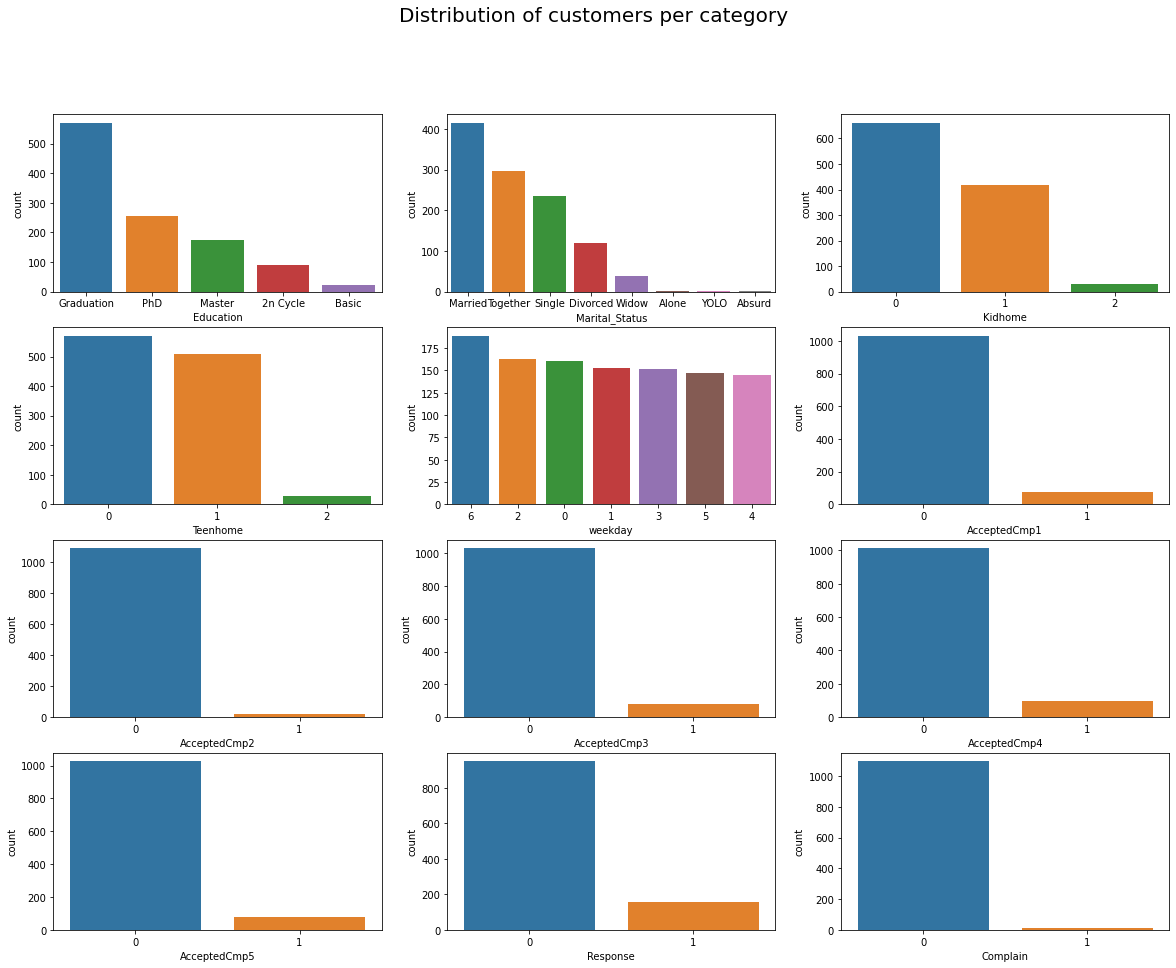

In [38]:
# 범주형 변수 시각화(내림차순)
fig, axes = plt.subplots(4, 3, figsize=(20,15))
fig.suptitle('Distribution of customers per category', fontsize=20)

for ax, feature in zip(axes.flatten(), categorical):
    sns.countplot(data = train, x = feature, order = train[feature].value_counts().index,ax=ax)
plt.show()

#### Countplot으로 확인한 컬럼별 Value의 빈도
- 교육 수준은 Graduation > PhD > Master > 2n Cycle > Basic Education 순서로 많음
- 결혼 상태는 Married > Together > Single 순서대로 많음
- 자녀(Kid, Teen)가 없는 가구가 과반수 이상
- 캠페인 수락 여부 => 두 번째 캠페인에서 제안 수락(1)이 최소
- 요일별 빈도: 일,수,월,화,목,토,금(6,2,0,1,3,5,4) 순으로 구매량 많음(일요일에 가장 많이 구매)

### Accepted_Campaign Column, Response들 분석

In [59]:
cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
cnt = 0
cmp_list = []
for col in cols:
    cnt = 0
    for value in train[col]:
        if value == 1:
            cnt += 1
    cmp_list.append(cnt)


In [60]:
cmp_list

[76, 17, 77, 95, 80, 157]

In [77]:
cmp_df = pd.DataFrame(cmp_list)

In [78]:
cmp_df

,0
0,76
1,17
2,77
3,95
4,80
5,157


In [79]:
tmp_list = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
cmp_df['Campaign_Idx']= tmp_list

In [80]:
cmp_df

,0,Campaign_Idx
0,76,AcceptedCmp1
1,17,AcceptedCmp2
2,77,AcceptedCmp3
3,95,AcceptedCmp4
4,80,AcceptedCmp5
5,157,Response


In [81]:
cmp_df.rename(columns={0:'Total Acceptance'},inplace=True)

In [82]:
cmp_df

,Total Acceptance,Campaign_Idx
0,76,AcceptedCmp1
1,17,AcceptedCmp2
2,77,AcceptedCmp3
3,95,AcceptedCmp4
4,80,AcceptedCmp5
5,157,Response


([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

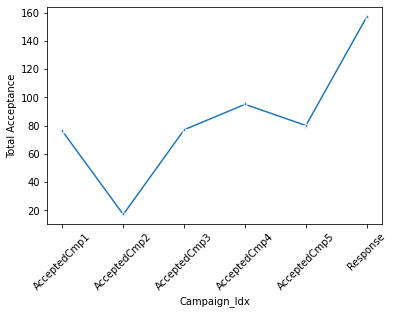

In [87]:
fig = sns.lineplot(data=cmp_df, x="Campaign_Idx", y="Total Acceptance", marker='*')
plt.xticks(rotation=45)

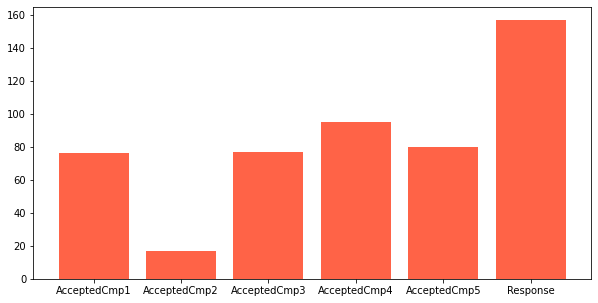

In [63]:
# 더 쉬운 방법...(참고: https://dacon.io/competitions/official/235893/codeshare/4885?page=1&dtype=recent)
cmps = [train.AcceptedCmp1.sum(), train.AcceptedCmp2.sum(), train.AcceptedCmp3.sum(), train.AcceptedCmp4.sum(), train.AcceptedCmp5.sum(), train.Response.sum()]
cmps_idx = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

plt.figure(figsize=(10,5))
plt.bar(cmps_idx,cmps,color='tomato')
plt.show()

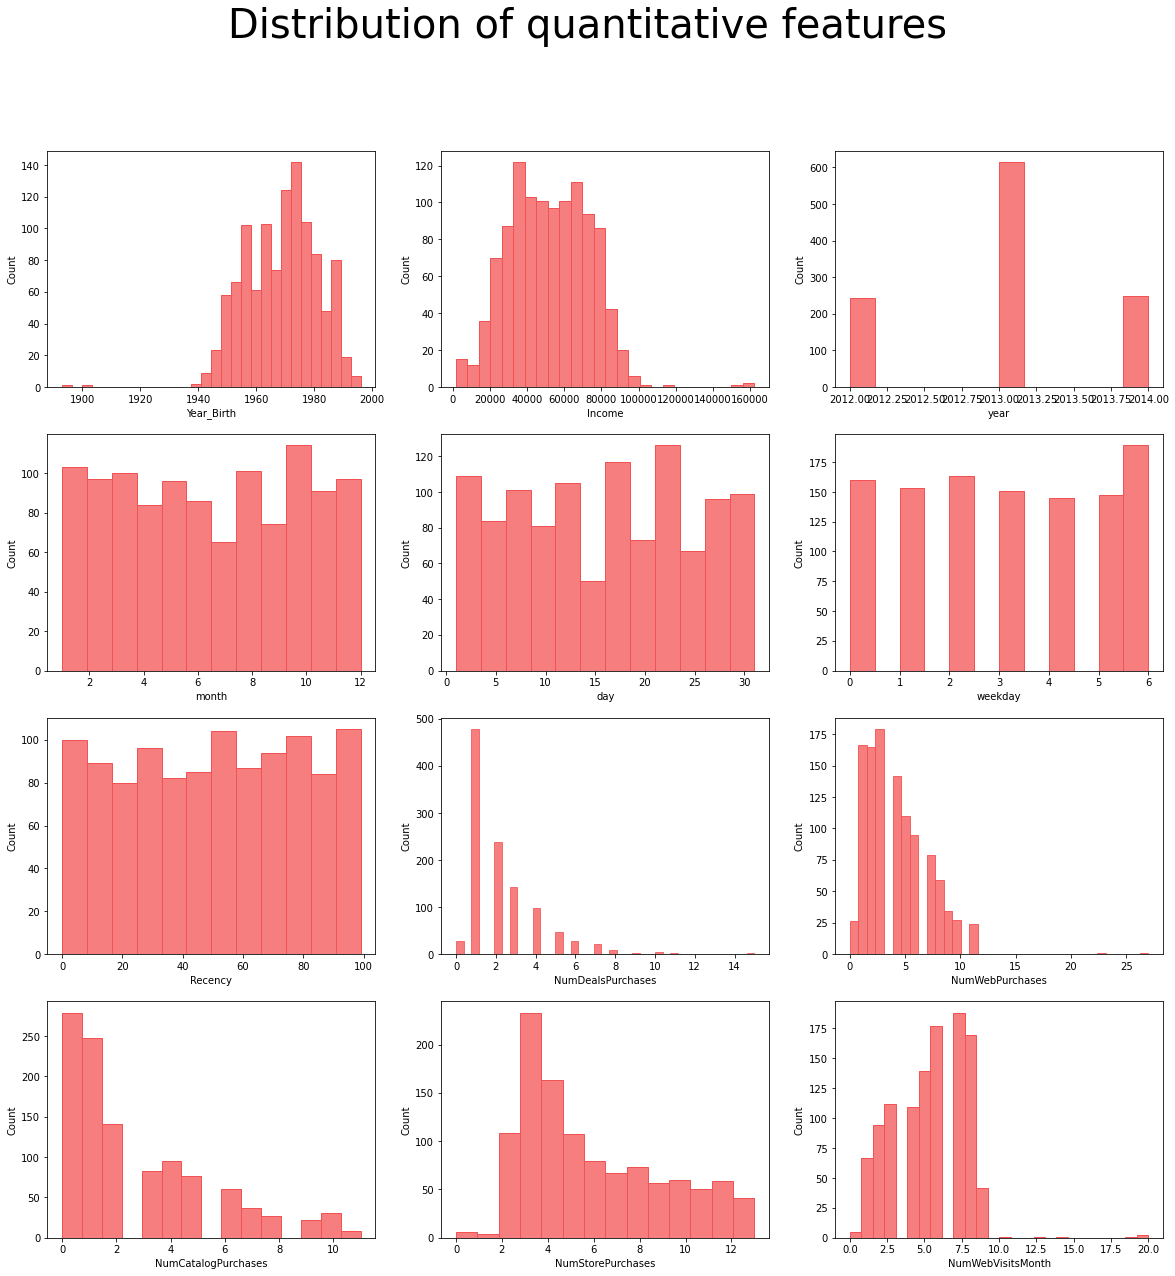

In [36]:
# 수치형 데이터 시각화
fig, axes = plt.subplots(4, 3, figsize=(20,20))
fig.suptitle('Distribution of quantitative features', fontsize=20)
#plt.tight_layout()

for ax,feature in zip(axes.flatten(),quantitative):
    sns.histplot(data = train, x = feature, ax=ax, color='#f55354', edgecolor='#f15354')
plt.show()

## 이상치 찾기 (수치형 데이터)

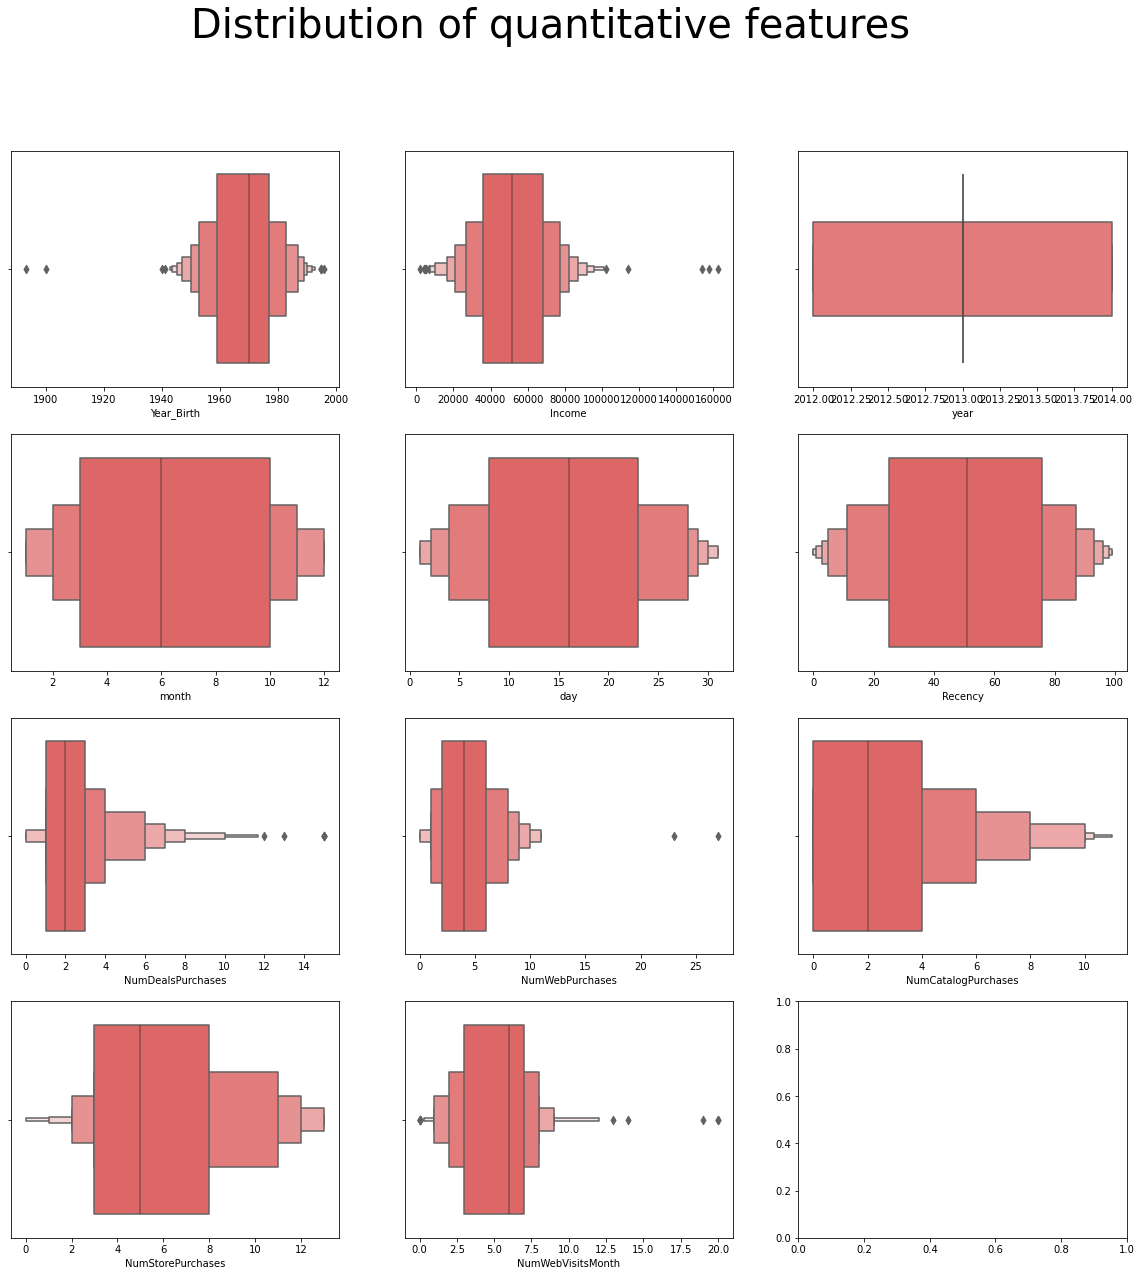

In [39]:
fig, axes = plt.subplots(4, 3, figsize=(20,20))
fig.suptitle('Distribution of quantitative features', fontsize=40)
#plt.tight_layout()

for ax,feature in zip(axes.flatten(),quantitative):
    sns.boxenplot(data = train, x = feature, ax=ax, color='#f15354')
plt.show()

* IQR: 사분위수의 상위 75% 지점의 값과 하위 25% 지점의 값 차이 (Q3 - Q1)
* IQR을 이용하여 이상치의 최대 제한선을 구하고 그 사이 범위 구하기

In [42]:
from scipy import stats
def IQR(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -(1.5 * IQR)
    upper_bound = Q3 +(1.5 * IQR)
    return lower_bound, upper_bound

outliers = train[quantitative].apply(lambda column: IQR(column))
print('IQR로 구한 이상치 범위')
outliers

IQR로 구한 이상치 범위


,Year_Birth,Income,year,month,day,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1932.0,-13066.25,2013.0,-7.5,-14.5,-51.5,-2.0,-4.0,-6.0,-4.5,-3.0
1,2004.0,117159.75,2013.0,20.5,45.5,152.5,6.0,12.0,10.0,15.5,13.0


In [43]:
# 날짜 제외한 변수의 이상치 범위
def IQRsum(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -(1.5 * IQR)
    upper_bound = Q3 +(1.5 * IQR)
    return ((column < lower_bound) | (column > upper_bound)).sum()

outliers = train[quantitative].drop(['year', 'month', 'day'], axis = 1).apply(lambda column: IQRsum(column))
print('Number of outliers by method')
outliers

Number of outliers by method


Year_Birth              2
Income                  3
Recency                 0
NumDealsPurchases      46
NumWebPurchases         2
NumCatalogPurchases     9
NumStorePurchases       0
NumWebVisitsMonth       4
dtype: int64

## Correlation 분석

In [90]:
quantitative.append('target')

In [46]:
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Text(0.5, 1.0, 'Correlation between features')

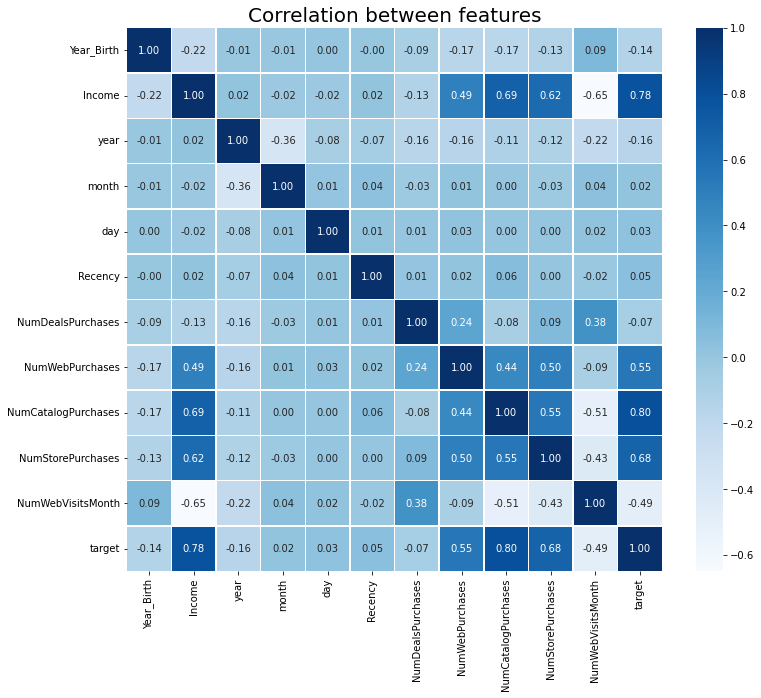

In [91]:
# 수치형 데이터 상관관계 히트맵 시각화
train_corr = train[quantitative]
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr = train_corr.corr(method= 'pearson')


plt.figure(figsize=(12,10))
sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=20)

In [94]:
# Target과 피쳐들의 상관관계
s28 = corr.unstack()
df_temp28 = pd.DataFrame(s28['target'].sort_values(ascending=False), columns=['target'])
df_temp28.style.background_gradient(cmap='viridis')

,target
target,1.000000
NumCatalogPurchases,0.798065
Income,0.784084
NumStorePurchases,0.677785
NumWebPurchases,0.546082
Recency,0.050873
day,0.027491
month,0.015810
NumDealsPurchases,-0.072802
Year_Birth,-0.136035


우리가 가장 관심있는 것은 총 제품 소비량와 어떤 컬럼이 가장 상관관계가 높은가 입니다.

그래프를 보니 NumCatalogPurchasest가 가장 높은 양의 상관관계가 있는것으로 나타났네요!

이는 카탈로그를 사용한 구매 수 많을수록 제품 소비량이 늘어나는 것으로 해석할 수 있겠습니다.

또한 상관계수가 0.3 이상이면 유의미한 양의 상관관계를 가진다고 해석할 수 있습니다.

그러므로 Income, NumStorePurchases, NumWebPurchases피쳐들도 상관계수가 0.3 이상이기 때문에 고객의 수입, 매장에서 직접 구매한 횟수, 웹사이트를 통한 구매 건수가 많을 수록 총 제품 소비량이 늘어난다는 결론을 도출 할 수 있겠습니다.

In [97]:
# Target과 상관관계가 높은 상위 4개의 Feature만 선정
new_df = train[[ 'target','Income', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


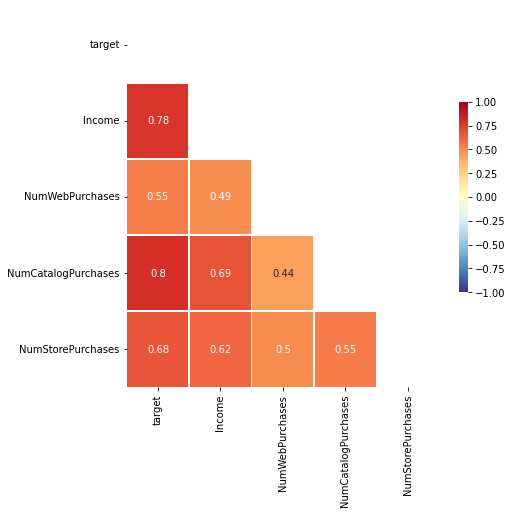

In [98]:
corr = new_df.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

# 모델링 (XGBoost)

## XGBoost 란?
1. 정의
- 약한 분류기를 세트로 묶어서 정확도를 예측하는 기법
- 욕심쟁이(Greedy Algorithm)을 사용하여 분류기를 발견하고 분산처리를 사용하여 빠른 속도로 적합한 비중 파라미터를 찾는 알고리즘
- boostin 알고리즘이 기본원리


2. 장점
- 병렬 처리를 사용하기에 학습과 분류가 빠름
- 유연성이 좋다. 커스텀 최적화 옵션을 제공함
- 욕심쟁이(Greedy-algorithm)을 사용한 자동 가지치기가 가능함, 과적합이 잘일어나지 않음
- 다른 알고리즘과 연계하여 앙상블 학습이 가능

### XGBoost Parameter
1) 일반 파라미터 - 도구의 모양을 결정
- booster : 어떤 부스터 구조를 쓸지 결정한다. ( gbtree, gblinear, dart)
- nthread : 몇개의 쓰레드를 동시에 처리하도록 할지 결정한다. 디폴트는 '가능한 많이'
- num_feature : feature차원의 숫자를 정해야하는 경우 옵션을 세팅. '디폴트는 가능한 많이'

2) 부스트 파라미터 - 트리마다 가지를 칠 때 적용하는 옵션을 정의
- eta: learning rate와 같다. 트리에 가지가 많을 수록 과적합하기 쉽다. 매 부스팅 스탭마다 weight를 주어 부스팅 과정에 과적합이 일어나지 않도록 한다.
- gamma: 정보흭득(information Gain)에서 -r로 표현한 바 있다. 이것이 커지면, 트리 깊이가 줄어들어 보수적인 모델이 된다. ( 디폴트는 0 )
- max_depth : 한 트리의 maxium depth. 숫자가를 키울수록 보델의 복잡도가 커진다. 과적합 하기 쉽다. 디폴트는 6, 이 때 리프노트의 개수는 최대 2^6 = 64개이다.
- lambda (L2 reg-form) : L2 Regularization Form에 달리는 weights이다. 숫자가 클수록 보수적인 모델이 된다.
- alpha(L1 reg-form) : L1 Regularization Form에 달리는 weights이다. 숫자가 클수록 보수적인 모델이 된다.

3) 학습과정 파라미터 - 최적화 퍼모먼스를 결정
- objective : 목적함수이다. reg:linear(linear-regression), 
- binary:logistic(binary-logistic-classification), count:poisson(count data poison regression) 등 다양
- eval_metric : 모델의 평가 함수를 조정하는 함수 - rmse(root mean square error), logloss(log-likelihood), map(mean average precision) 등 데이터의 특성에 맞게 평가 함수를 조정

4) 커멘드 라인 파라미터
- num_rounds : 부스팅 라운드를 결정한다. 랜덤하게 생성되는 모델이니만큼 이 수 가 적당히 큰게 좋다 epochs 옵션과 동일하다 .


In [99]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [100]:
X = train.drop('target', axis=1)
y = train['target']

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(X['Education'])
col = le.transform(X['Education'])
X['Education']=col
test['Education']=le.transform(test['Education'])

In [109]:
le = LabelEncoder()
le.fit(X['Marital_Status'])
col = le.transform(X['Marital_Status'])
X['Marital_Status']=col
test['Marital_Status']=le.transform(test['Marital_Status'])

In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   int64  
 3   Marital_Status       1108 non-null   int64  
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Recency              1108 non-null   int64  
 8   NumDealsPurchases    1108 non-null   int64  
 9   NumWebPurchases      1108 non-null   int64  
 10  NumCatalogPurchases  1108 non-null   int64  
 11  NumStorePurchases    1108 non-null   int64  
 12  NumWebVisitsMonth    1108 non-null   int64  
 13  AcceptedCmp3         1108 non-null   int64  
 14  AcceptedCmp4         1108 non-null   int64  
 15  AcceptedCmp5         1108 non-null   i

In [113]:
X.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year,month,day,weekday
0,0,1974,3,5,46014.0,1,1,21,10,7,...,0,0,0,0,0,0,2013,1,21,0
1,1,1962,2,4,76624.0,0,1,68,1,5,...,0,0,0,0,0,0,2014,5,24,5
2,2,1951,2,3,75903.0,0,1,50,2,6,...,0,0,0,0,0,0,2013,8,4,6
3,3,1974,1,3,18393.0,1,0,2,2,3,...,0,0,0,0,0,0,2014,3,29,5
4,4,1946,4,5,64014.0,2,1,56,7,8,...,0,0,1,0,0,0,2014,10,6,0


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
xgb_model = xgboost.XGBRegressor()

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

886 222
[04:22:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [116]:
pred = xgb_model.predict(X_test)
score = NMAE(y_test, pred)
score

0.20690963933726494

In [117]:
test.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year,month,day,weekday
0,0,1979,2,4,57537.0,1,0,83,4,4,...,0,0,0,0,0,0,2013,10,6,6
1,1,1955,2,5,65748.0,0,1,58,2,2,...,0,0,0,0,1,0,2013,4,15,0
2,2,1984,2,3,55434.0,1,0,21,3,5,...,0,0,0,0,0,0,2013,5,10,4
3,3,1960,2,3,67716.0,0,1,8,4,7,...,1,0,0,0,0,0,2013,10,1,1
4,4,1976,2,5,85606.0,0,1,89,2,6,...,0,0,1,0,0,0,2012,12,11,1


In [119]:
test_pred = xgb_model.predict(test)
submit['target'] = test_pred

In [120]:
submit.to_csv('xgb-prediction.csv',index=False)
submit

,id,target
0,0,704.226196
1,1,733.427185
2,2,814.048462
3,3,1010.352539
4,4,1292.679565
...,...,...
1103,1103,52.403984
1104,1104,44.746273
1105,1105,79.161789
1106,1106,1232.093384
